## Анализ данных  Google Play Market

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

#графики в svg 
%config InlineBackend.figure_format = 'svg' 
sns.set(style="darkgrid")

#увеличение размер графиков
from pylab import rcParams
rcParams['figure.figsize'] =15, 8
import pandas as pd


## Импорт данных

In [47]:
# Импортируем данные  stat  inpit
#https://www.kaggle.com/lava18/google-play-store-apps
app_data = pd.read_csv("googleplaystore.csv")
app_data.columns = ["app", "category", "raiting", "reviews", "size", "installs","type","price","content_raiting","geners","last_updated","current_ver","android_ver"]
#app_data['datestamp'] =  pd.to_datetime(app_data['last_updated'])
#нормализуем немного
app_data['installs_int'] = app_data['installs'].str.replace('+','')
app_data['installs_int'] = app_data['installs_int'].str.replace(',','')
app_data['installs_int'] = app_data['installs_int'].str.replace('Free','0')
app_data['installs_int'] = pd.to_numeric(app_data['installs_int'])
app_data['reviews'] = pd.to_numeric(app_data['reviews'], errors='coerce')
#удаляем повторяющееся приложения, считаем, что первое это уникальное.(я сделал несколько выборок и убедился, что это так)
app_data.drop_duplicates(subset ="app", keep = 'first', inplace = True)
app_data.raiting.fillna(0, inplace=True)
#app_data.type_of_connection.fillna(0, inplace=True)

## Топ-15 приложений по количеству обзоров

In [48]:
app_data.sort_index(by="reviews", ascending=False).head(15)

,app,category,raiting,reviews,size,installs,type,price,content_raiting,geners,last_updated,current_ver,android_ver,installs_int
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1000000000
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
2545,Instagram,SOCIAL,4.5,66577313.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
1670,Clash of Clans,GAME,4.6,44891723.0,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,100000000
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,500000000
1654,Subway Surfers,GAME,4.5,27722264.0,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1000000000
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,1000000000
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999.0,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device,500000000
1660,Clash Royale,GAME,4.6,23133508.0,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up,100000000


## Топ-20 приложений в категории "Игры", скачанные более 1000000 раз

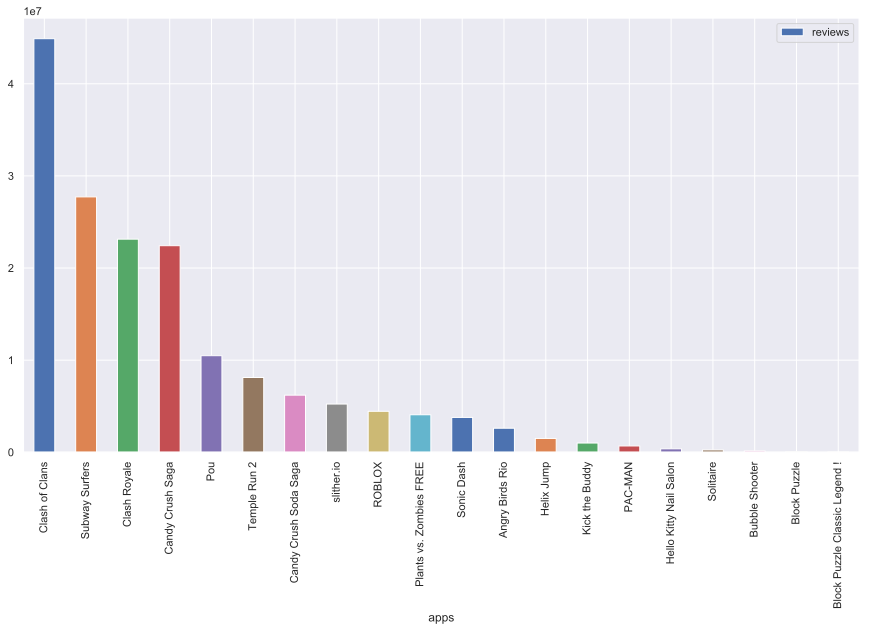

In [56]:
df3 = pd.DataFrame(app_data[(app_data.category=="GAME") & (app_data.installs_int > 1000000)].head(20))
df = pd.DataFrame({'apps':df3['app'].tolist(), 'reviews': df3['reviews'].tolist()})
df.sort_values("reviews", ascending=False).plot.bar(x='apps', y='reviews', rot=90,sort_columns = True,legend =True)


In [12]:
app_data.installs_int.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

## Топ-20 в категории 18+

<Figure size 1080x576 with 0 Axes>

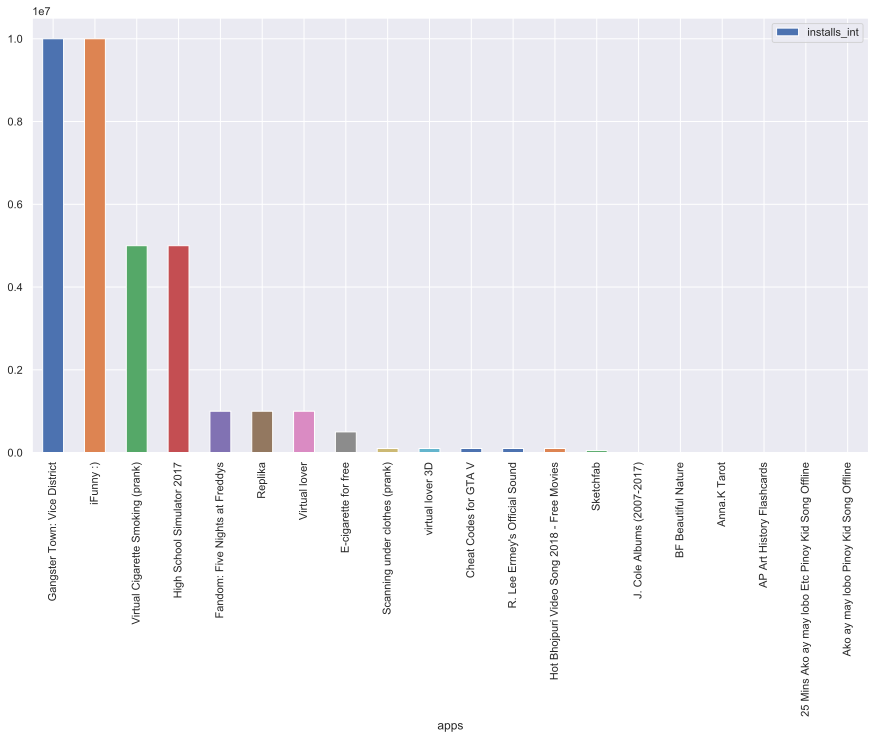

In [55]:
fig = plt.figure()
df4 = pd.DataFrame(app_data[(app_data.content_raiting=="Mature 17+") & (app_data.category=="FAMILY")].head(20))
df = pd.DataFrame({'apps':df4['app'].tolist(), 'installs_int': df4['installs_int'].tolist()})
df.sort_values("installs_int", ascending=False).plot.bar(x='apps', y='installs_int', rot=90,sort_columns = True,legend =True)

In [14]:
fig = ax.get_figure()
fig.savefig('top20_18.png')

## Топ-20 приложений в категории коммуникации

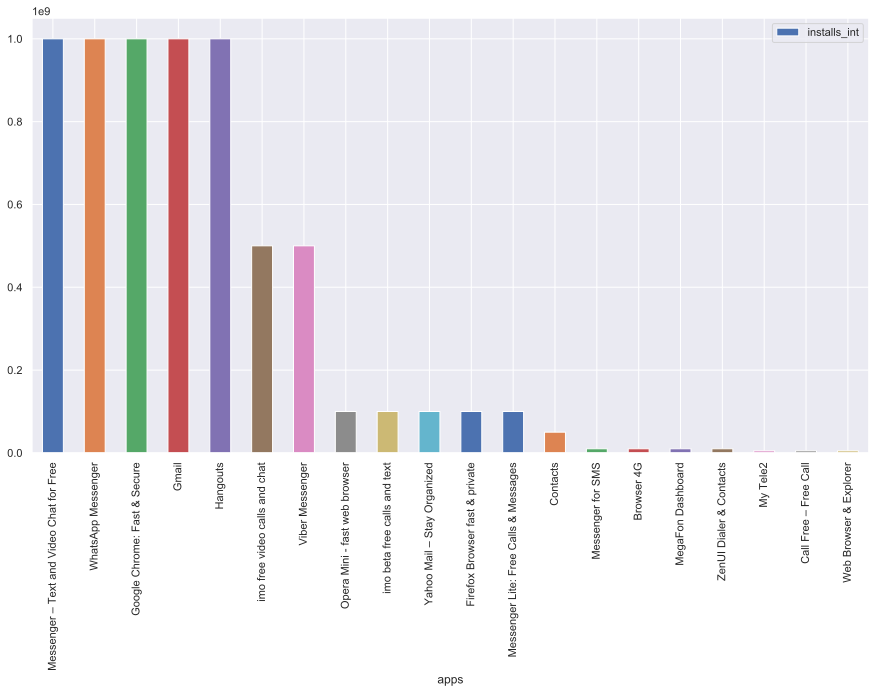

In [57]:
#df4 = pd.DataFrame(app_data[app_data.category=="COMMUNICATION"].head(20))
#df = pd.DataFrame({'apps':df4['app'].tolist(), 'installs_int': df4['installs_int'].tolist()})
#ax = df.plot.bar(x='apps', y='installs_int', rot=90)

df3 = pd.DataFrame(app_data[app_data.category=="COMMUNICATION"].head(20))
df = pd.DataFrame({'apps':df3['app'].tolist(), 'installs_int': df3['installs_int'].tolist()})
df.sort_values("installs_int", ascending=False).plot.bar(x='apps', y='installs_int', rot=90,sort_columns = True,legend =True)